## ProdigyInfotech

#### Task-02 Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.
#### Dataset used : Mall Customer Segmentation Data , https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#### Loading Dataset

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Information about data

In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# another method to check missing value
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# choosing the annual income column & spending score column
X = customer_data.iloc[:, [3,4]].values

In [6]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=40)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Dipendra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


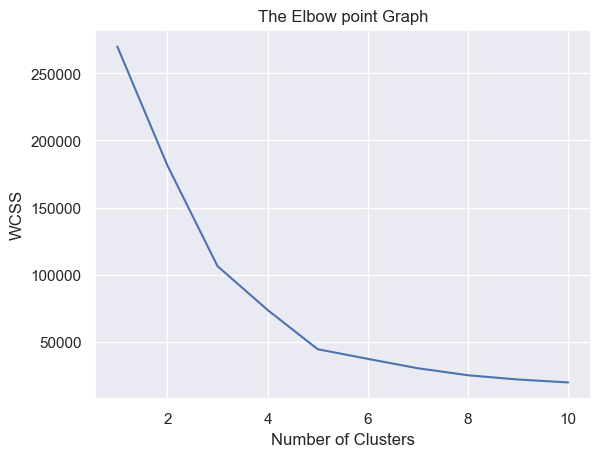

In [7]:
# plotting an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

###### Optimum numbers of clusters = 5

#### Training the K-Means Clustering Model


In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# returning a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
Y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

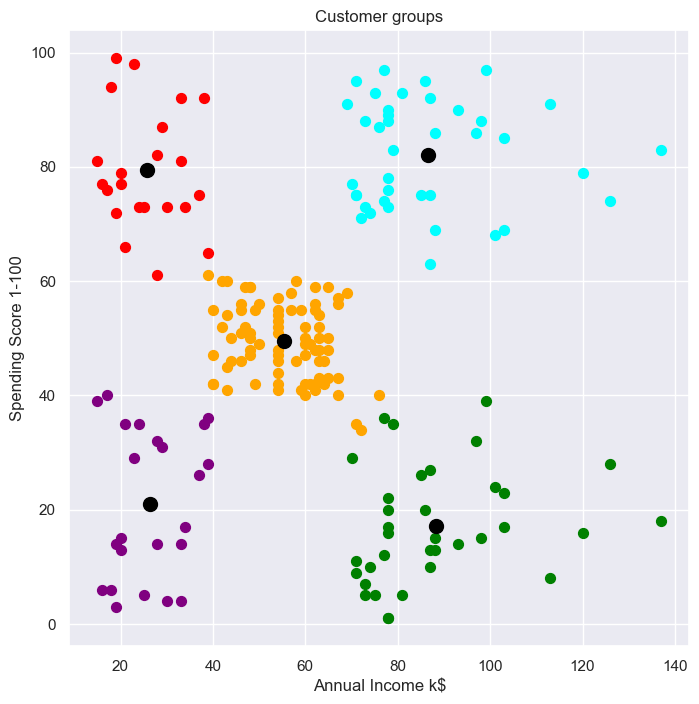

In [9]:
# Data visualizing for better understanding of the clusters
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label = 'Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='orange', label = 'Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='cyan', label = 'Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='red', label = 'Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='purple', label = 'Cluster 5')

# plotting the centeroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centeroids')

plt.title('Customer groups')
plt.xlabel('Annual Income k$')
plt.ylabel('Spending Score 1-100')
plt.show()